## Math 472 Final Coding Portion
### Rachel Singleton

### 1) Reproduce Figure 11.3 on page 369

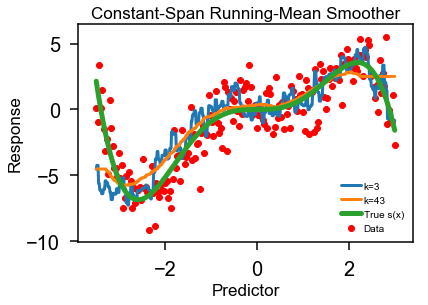

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
%matplotlib inline

data = pd.read_csv("easysmooth.dat", delimiter=" ")
X = data['X'].to_numpy().reshape((200,1))
Y = data['Y'].to_numpy().reshape((200,1))

n=200
k1 = 3
k2 = 43

def true_s(x):
    return (x**3)*np.sin((x+3.4)/2)

def constant_mean(k,vals):
    knn = neighbors.KNeighborsRegressor(k)
    a = knn.fit(X,Y).predict(vals)
    return a

vals = np.linspace(-3.5,3,500)
values = np.linspace(-3,3,500)[:, np.newaxis]
predict1 = constant_mean(k1,values)
predict2 = constant_mean(k2,values)

plt.plot(vals,predict1,label="k=3")
plt.plot(vals,predict2,label="k=43")
plt.plot(vals,true_s(vals),linewidth=5,label="True s(x)")
plt.scatter(X,Y,c="r",label="Data")
plt.title("Constant-Span Running-Mean Smoother",fontsize=17)
plt.xlabel('Predictor',fontsize=17)
plt.ylabel('Response',fontsize=17)
plt.legend()
plt.show()

### 2) Reproduce Figure 11.4 on page 370 - plot A: CVRSS_k(s_hat_k) versus k using equation (11.16)

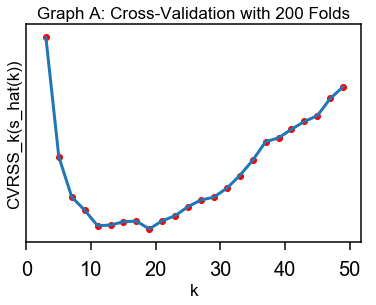

In [2]:
startingtime = time.time()
from scipy.interpolate import interp1d

def create_S(k,n):
    S = np.zeros((n,n))
    val = (k-1)//2
    if(k > 1):
        for i in range(val):
            S[i,0:(val+i)] = 1/(k-val+i-1)
            S[n-i-1,(n-val-i):n] = 1/(k-val+i-1)

        for i in range((val+1),(n-val)):
            S[i,(i-val):(i+val)] = 1/k
    return S

k_plot = []
CVRSS_plot = []
for k in range(3,51,2):
    CVRSS = []
    for i in range(200):
        Y_new = np.delete(Y,i)
        X_new = np.delete(X,i)
        S = create_S(k,199)
        s_hat = S.dot(Y_new)

        foo = interp1d(X_new,s_hat,fill_value="extrapolate")
        miss_val = foo(X[i])

        CVRSS.append((Y[i][0] - miss_val)**2)
    CVRSS_plot.append(np.sum(CVRSS))
    k_plot.append(k)

plt.plot(k_plot,CVRSS_plot)
plt.scatter(k_plot,CVRSS_plot,c='r')
plt.title("Graph A: Cross-Validation with 200 Folds",fontsize=17)
plt.xlabel('k',fontsize=17)
plt.ylabel('CVRSS_k(s_hat(k))',fontsize=17)
plt.legend
plt.yticks([])
plt.xticks([0,10,20,30,40,50])
plt.show()
Q2 = time.time()-startingtime

### 3) Produce plot B: CVRSS_k(s_hat_k) versus k using equation (11.18)

/Users/Rachel/VIP_Stuff/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/Rachel/VIP_Stuff/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


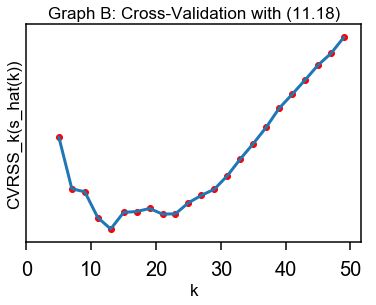

In [3]:
startingtime = time.time()
k_plot = []
CVRSS_plot = []

def create_resid(k,n):
    S = np.zeros((n,n))
    val = (k-1)//2
    if(k > 1):
        for i in range(val+1):
            S[i,0:(val+i)] = 1/(k-val+i-1)
            S[n-i-1,(n-val-i):n] = 1/(k-val+i-1)

        for i in range((val),(n-val-1)):
            S[i,(i-val):(i+val+1)] = 1/k

    s_hat = S.dot(Y)
    resid = np.sum(((Y-s_hat)/(1-np.diagonal(S)))**2)
    return resid

for k in range(3,51,2):
    CVRSS_plot.append(create_resid(k,Y.size))
    k_plot.append(k)
    
plt.plot(k_plot,CVRSS_plot)
plt.scatter(k_plot,CVRSS_plot,c='r')
plt.title("Graph B: Cross-Validation with (11.18)",fontsize=17)
plt.xlabel('k',fontsize=17)
plt.ylabel('CVRSS_k(s_hat(k))',fontsize=17)
plt.legend
plt.yticks([])
plt.xticks([0,10,20,30,40,50])
plt.show()
Q3 = time.time() - startingtime

### 4) Produce plot C: the cross-validated residual sum of squares using 5-fold cross-validation described on page 371

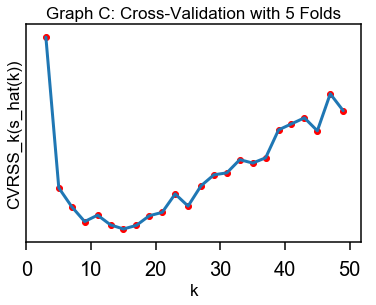

In [4]:
startingtime = time.time()
from sklearn.model_selection import KFold

k_plot = []
CVRSS_plot = []

for k in range(3,51,2):
    CVRSS = []
    kf = KFold(n_splits=5, random_state=None, shuffle=True)
    for train_index, test_index in kf.split(Y):
#         print("Keep:", train_index, "Remove:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        S = create_S(k,160)
        s_hat = S.dot(Y_train)
        
        foo = interp1d(X_train.reshape(160,),s_hat.reshape(160,),fill_value="extrapolate")
        miss_val = foo(X_test)

        CVRSS.append((Y_test - miss_val)**2)
    CVRSS_plot.append(np.sum(CVRSS)) 
    k_plot.append(k)

plt.plot(k_plot,CVRSS_plot)
plt.scatter(k_plot,CVRSS_plot,c='r')
plt.title("Graph C: Cross-Validation with 5 Folds",fontsize=17)
plt.xlabel('k',fontsize=17)
plt.ylabel('CVRSS_k(s_hat(k))',fontsize=17)
plt.legend
plt.yticks([])
plt.xticks([0,10,20,30,40,50])
plt.show()
Q4 = time.time() - startingtime

In [5]:
print("Running times for above methods:")
print("Question 2:",Q2)
print("Question 3:",Q3)
print("Question 4:",Q4)

Running times for above methods:
Question 2: 2.189363956451416
Question 3: 0.11684393882751465
Question 4: 0.15522980690002441


### 5) Using appropriate figures and tables to compare the plots A, B, and C and the corresponding computational times

The method without using any folds (Question 3) had the fastest computational time at 0.117 seconds. The second fastest method was the one with 5 folds (0.155 seconds) but was less accurate. The graph follows the general pattern of the other two but is much more jagged with peaks and valleys as k increases. This makes it hard to find a good range for k since sometimes one k is good but the next one increases bias. The slowest method was the one with 200 folds (2.189 seconds). It was very accurate though and looked very similar to the graph that didn't use any folding. 